<br>

<center><img src='../Header/header.png' style="width1:700px"></center>

<br>

<p style="font-size: 30px; text-align: center;"> <b>Session 2 - Seismic Data Visualization</b></p>

___

<br>

<center><img src="./NB_images/F3_impression.png" style="width:550px"></center>

<br>

For this tutorial, we will use a filtered subvolume of the the open-source **3D Post-Stack Seismic F3 data** (see https://terranubis.com/datainfo/F3-Demo-2023), which is a block in the Dutch sector of the North Sea. The block is covered by 3D seismic that was acquired to explore for oil and gas in the Upper-Jurassic - Lower Cretaceous strata. The upper 1200ms of the demo set consists of reflectors belonging to the Miocene, Pliocene, and Pleistocene. The large-scale sigmoidal bedding is readily apparent, and consists of the deposits of a large fluviodeltaic system that drained large parts of the Baltic Sea region (Sørensen et al, 1997; Overeem et al, 2001). 

## Loading a seismic volume (.sgy) and inspecting slices

For this task, we will use Equinor's [segyio](https://github.com/equinor/segyio) library which describes itself as follows:

> Segyio is a small LGPL licensed C library for easy interaction with SEG Y formatted seismic data, with language bindings for Python and Matlab. Segyio is an attempt to create an easy-to-use, embeddable, community-oriented library for seismic applications. Features are added as they are needed; suggestions and contributions of all kinds are very welcome.

It allows us to load 2D and 3D seismic, but of course with all the [usual caveats about the segy format](https://agilescientific.com/blog/2014/3/26/what-is-seg-y.html).

So let's first import and inspect a curated seismic cube.

In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [91]:
import segyio

filename = './Input/F3_Dip_steered_median_subvolume_IL230-430_XL475-675_T1600-1800.sgy'
with segyio.open(filename) as s:
    # Extract attributes
    print(f"Number of traces: {s.tracecount}")
    print(f"Sample interval: {s.bin[segyio.BinField.Interval]} microseconds: 0.004 seconds")
    print(f"Number of samples per trace: {s.samples.size}; total recording time: {s.samples.size * s.bin[segyio.BinField.Interval] / 1e6} seconds")
    print(f"Inline range: {s.ilines.min()} to {s.ilines.max()}; total of {len(s.ilines)} inlines")
    print(f"Crossline range: {s.xlines.min()} to {s.xlines.max()}; total of {len(s.xlines)} crosslines")
    c = segyio.cube(s)
    
print('\nType of data samples in the cube:', type(c[0,0,0]))

Number of traces: 40401
Sample interval: 4000 microseconds: 0.004 seconds
Number of samples per trace: 51; total recording time: 0.204 seconds
Inline range: 230 to 430; total of 201 inlines
Crossline range: 475 to 675; total of 201 crosslines

Type of data samples in the cube: <class 'numpy.float32'>


We can extract the header of one trace to see what information is stored there. They are stored as a dictionary. 

In python, a `dictionary` is a collection of key-value pairs (called `items`), where each key is unique and maps to a specific value. In this case, the keys represent different header fields (like trace number, inline number, crossline number, etc.), and the values are the corresponding data for those fields.

Example of dictionary structure:
```python
header = {
    'TraceNumber': 1001,
    'InlineNumber': 250,
    'CrosslineNumber': 300,
    'SourceX': 123456,
    'SourceY': 654321,
    # ... other header fields
}

header['TraceNumber']  # This would return 1001
```

```python

In [92]:
# Display header information for a single trace
with segyio.open(filename) as f:
    trace_num = 10000  # First trace
    print(f"Header information for trace {trace_num}:")
    print("=" * 60)
    # Header is stored as a dictionary
    for field, value in f.header[trace_num].items():
        print(f"{str(field):40s}: {value}")

Header information for trace 10000:
TRACE_SEQUENCE_LINE                     : 152
TRACE_SEQUENCE_FILE                     : 10001
FieldRecord                             : 279
TraceNumber                             : 0
EnergySourcePoint                       : 0
CDP                                     : 626
CDP_TRACE                               : 0
TraceIdentificationCode                 : 1
NSummedTraces                           : 0
NStackedTraces                          : 0
DataUse                                 : 1
offset                                  : 0
ReceiverGroupElevation                  : 0
SourceSurfaceElevation                  : 0
SourceDepth                             : 0
ReceiverDatumElevation                  : 0
SourceDatumElevation                    : 0
SourceWaterDepth                        : 0
GroupWaterDepth                         : 0
ElevationScalar                         : 0
SourceGroupScalar                       : -10
SourceX                     

In [93]:
c.shape # (inlines, xlines, timeslices)

(201, 201, 51)

In [94]:
# What is the maximum absolute amplitude in the cube?
np.max(np.abs(c))

np.float32(21683.0)

In [95]:
# What is the minimum value different from zero in the cube?
np.min(np.abs(c[np.nonzero(c)]))

np.float32(1.0)

In [96]:
# Let's convert the convert the 32 bit floats to 16 bit integers to save memory
c = c.astype(np.int16)
type(c[0,0,0])

numpy.int16

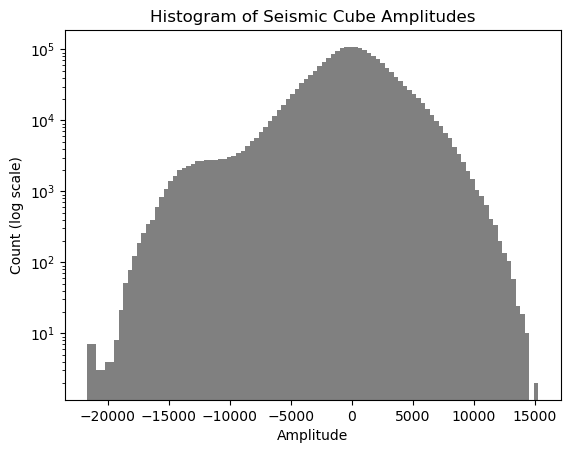

In [97]:
# Make a histogram of the inline amplitudes
plt.hist(c.flatten(), bins=100, color='gray')
plt.yscale('log')
plt.title('Histogram of Seismic Cube Amplitudes')
plt.xlabel('Amplitude')
plt.ylabel('Count (log scale)')
plt.show()

In [98]:
np.max(np.abs(c))

np.int16(21683)

In [99]:
c[150, :, :].shape

(201, 51)

#### Plot inline, crossline, and time slice from the seismic cube
```

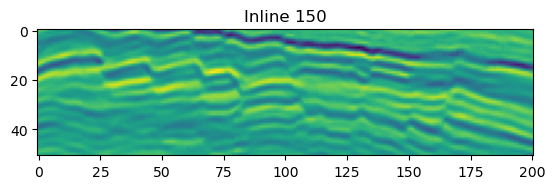

In [ ]:
# Plot inline by slicing

plt.imshow(c[150, :, :].T)
plt.title('Inline 150')
plt.show()

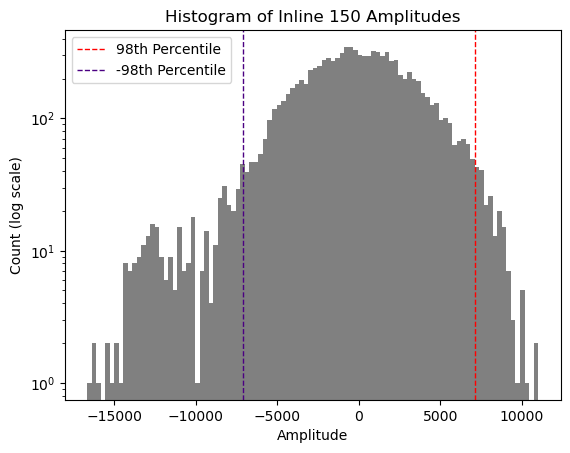

Number of pixels above the 98th percentile (7110.0): 205
Number of pixels below the -98th percentile (-7110.0): 361
Total number of pixels: 10251


In [120]:
# Make a histogram of the inline amplitudes

plt.hist(c[150, :, :].flatten(), bins=100, color='gray')
# Show the 98th percentile limit
plt.axvline(x=np.percentile(c[150, :, :], 98), color='red', linestyle='dashed', linewidth=1, label='98th Percentile')
# Show the negative 98th percentile limit
plt.axvline(x=-np.percentile(c[150, :, :], 98), color='indigo', linestyle='dashed', linewidth=1, label='-98th Percentile')
plt.yscale('log')
plt.title('Histogram of Inline 150 Amplitudes')
plt.xlabel('Amplitude')
plt.ylabel('Count (log scale)')
plt.legend()
plt.show()

# Print the number of pixels beyond the 98th percentile limits
upper_limit = np.percentile(c[150, :, :], 98)
lower_limit = -upper_limit
num_upper = np.sum(c[150, :, :] > upper_limit)
num_lower = np.sum(c[150, :, :] < lower_limit)
print(f"Number of pixels above the 98th percentile ({upper_limit}): {num_upper}")
print(f"Number of pixels below the -98th percentile ({lower_limit}): {num_lower}")
# Total number of pixels
total_pixels = c[150, :, :].size
print(f"Total number of pixels: {total_pixels}")

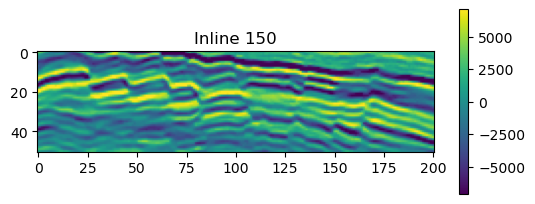

In [112]:
# Improve the contrast by setting vmin and vmax

ma = np.percentile(c[150, :, :],  98)
plt.title('Inline 150')
plt.imshow(c[150, :, :].T, vmin=-ma, vmax=ma, cmap='viridis')
# Plot a small colorbar to indicate amplitude scale
plt.colorbar(shrink=0.5)
plt.show()

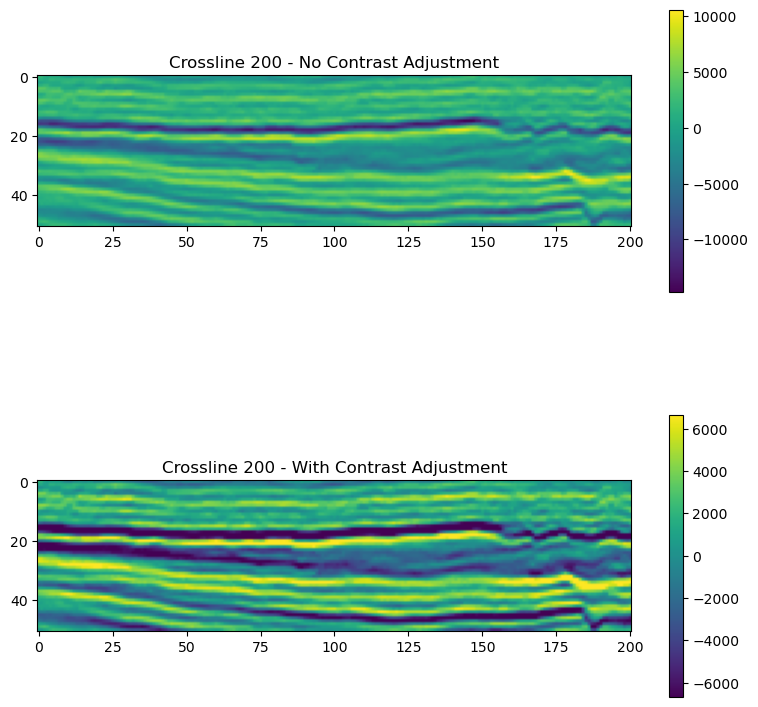

In [121]:
# Do a 2 by one subplot showing the crossline without and with contrast adjustment. Show colorbar for each
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# First subplot - No contrast adjustment
im0 = axs[0].imshow(c[:, 200, :].T)
axs[0].set_title('Crossline 200 - No Contrast Adjustment')
plt.colorbar(im0, ax=axs[0], shrink=0.5)

# Second subplot - With contrast adjustment
ma = np.percentile(c[:, 200, :], 98)
im1 = axs[1].imshow(c[:, 200, :].T, vmin=-ma, vmax=ma, cmap='viridis')
axs[1].set_title('Crossline 200 - With Contrast Adjustment')
plt.colorbar(im1, ax=axs[1], shrink=0.5)

plt.tight_layout()
plt.show()

In [104]:
# Show available colormaps

plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

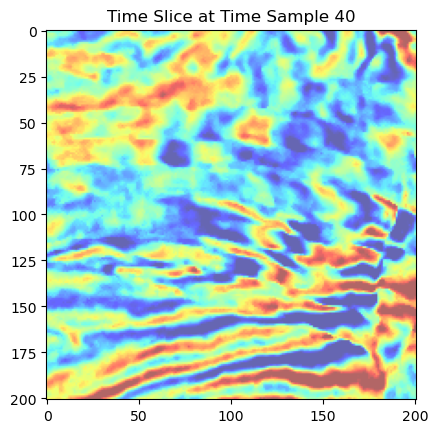

In [ ]:
# Plot time slice at time sample

ma = np.percentile(c[:, :,40], 98)
plt.imshow(c[:, :,40].T, vmin=-ma, vmax=ma, cmap='jet', alpha=0.6) # 'Greys_r'
plt.title('Time Slice at Time Sample 40')
plt.show()

## Scanning through a seismic volume interactively

As we did before, we can use `interact` to explore this cube on the fly, as long as it fits in memory of course. We will define a `seismic loading` function, a `seismic plotting` function, and finally call this plotting function with `interact`:

In [105]:
def load_seismic(filename):
    """
    Load a seismic cube
    Args:
        volume path
    Return:
        numpy array
    """
    with segyio.open(filename) as s:
        vol = segyio.cube(s).astype(np.int16)
    return vol

Python has a very useful library called `ipywidgets` that allows us to create interactive widgets in Jupyter Notebooks. One of the most commonly used functions from this library is `interact` (see https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html), which automatically generates user interface controls (like sliders, dropdowns, etc.) based on the function arguments you provide. This makes it easy to explore data and visualize results interactively without having to write a lot of boilerplate code.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import os

#----------------------------------------------------------
#  Multi-view seismic plotter (inline + xline + timeslice)
#----------------------------------------------------------
def seismic_plotter_all(colormap, inline, xline, timeslice, volume, save_figure, output_name):
    """Plot inline, crossline, and time-slice together."""
    
    # load seismic volume
    vol = load_seismic(volume)  # <- your function
    
    # amplitude scaling
    ma = np.percentile(vol, 98)

    # extract sections
    inline_sec     = vol[inline, :, :].T
    xline_sec      = vol[:, xline, :].T
    timeslice_sec  = vol[:, :, timeslice]

    # figure
    fig, axes = plt.subplots(3, 1, figsize=(16, 18))

    # ----- INLINE -----
    im0 = axes[0].imshow(inline_sec, aspect=1, vmin=-ma, vmax=ma, cmap=colormap)
    axes[0].set_title(f"Inline {inline}", color='r')
    axes[0].axhline(y=timeslice, color='b')
    axes[0].axvline(x=xline,    color='g')

    # ----- XLINE -----
    im1 = axes[1].imshow(xline_sec, aspect=1, vmin=-ma, vmax=ma, cmap=colormap)
    axes[1].set_title(f"Crossline {xline}", color='g')
    axes[1].axhline(y=timeslice, color='b')
    axes[1].axvline(x=inline,    color='r')

    # ----- TIMESLICE -----
    im2 = axes[2].imshow(timeslice_sec, aspect='equal', vmin=-ma, vmax=ma, cmap=colormap)
    axes[2].set_title(f"Time-slice {timeslice}", color='b')
    axes[2].axhline(y=xline,     color='g')
    axes[2].axvline(x=inline,    color='r')

    # common colorbar
    fig.colorbar(im2, ax=axes.ravel().tolist(), shrink=0.4, label="Amplitude")
    
    # Save figure if requested
    if save_figure:
        output_dir = './Output'
        os.makedirs(output_dir, exist_ok=True)
        output_path = os.path.join(output_dir, f"{output_name}.png")
        fig.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved to: {output_path}")
    
    plt.show()
    
_ = interact(
    seismic_plotter_all,
    
    colormap=['Greys', 'Greys_r', 'seismic', 'seismic_r', 'viridis', 'plasma', 'inferno', 'magma'],

    inline=widgets.IntSlider(
        value=100, min=0, max=201, step=1, continuous_update=True,
        description='<font color="red">inline</>'
    ),

    xline=widgets.IntSlider(
        value=100, min=0, max=201, step=1, continuous_update=True,
        description='<font color="green">xline</>'
    ),

    timeslice=widgets.IntSlider(
        value=25, min=0, max=51, step=1, continuous_update=True,
        description='<font color="blue">timeslice</>'
    ),

    volume=filename,  # <- your SEG-Y cube
    
    save_figure=widgets.Checkbox(
        value=False,
        description='Save Figure'
    ),
    
    output_name=widgets.Text(
        value='seismic_multiview',
        description='File Name:',
        placeholder='Enter filename without extension'
    )
)

interactive(children=(Dropdown(description='colormap', options=('Greys', 'Greys_r', 'seismic', 'seismic_r', 'v…